In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import random

from tensorflow import keras
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [3]:
image_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [4]:
training_set = image_generator.flow_from_directory(batch_size=32,
                                                   directory="datasets/train/",
                                                   shuffle=False,
                                                   target_size=(224, 224),
                                                   subset="training",
                                                   class_mode="categorical")

validation_set = image_generator.flow_from_directory(batch_size=32,
                                                   directory="datasets/validation/",
                                                   shuffle=False,
                                                   target_size=(224, 224),
                                                   subset="training",
                                                   class_mode="categorical")

testing_set = image_generator.flow_from_directory(batch_size=32,
                                                   directory="datasets/test/",
                                                   shuffle=False,
                                                   target_size=(224, 224),
                                                   class_mode="categorical")

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.
Found 128 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

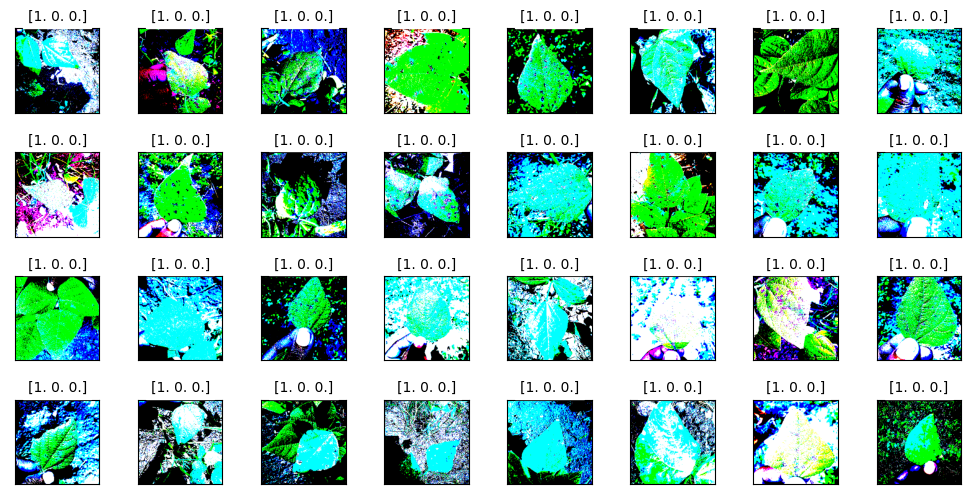

In [5]:
fig = plt.figure(figsize=(10, 10))

batch_1_img = training_set[0]
for i in range(32):
    digit = batch_1_img[0][i]
    label = batch_1_img[1][i]
    #digit_image = digit.reshape(28, 28)
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digit, cmap=plt.cm.binary)
    ax.set_title(str(label), backgroundcolor='white', fontsize=10)
plt.tight_layout()

In [6]:
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in resnet_model.layers:
    layer.trainable = False
    
x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.models.Model(inputs=resnet_model.input, outputs=predictions)

In [7]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                         patience=10,
                                         restore_best_weights=True)

In [8]:
history = model.fit(training_set, epochs=50, validation_data=validation_set)

Epoch 1/50
33/33 [==============================] - 7s 110ms/step - loss: 1.7494 - accuracy: 0.5358 - val_loss: 0.6730 - val_accuracy: 0.7368
Epoch 2/50
33/33 [==============================] - 3s 87ms/step - loss: 0.5587 - accuracy: 0.7727 - val_loss: 0.3441 - val_accuracy: 0.8872
Epoch 3/50
33/33 [==============================] - 3s 91ms/step - loss: 0.5277 - accuracy: 0.8162 - val_loss: 0.5159 - val_accuracy: 0.7820
Epoch 4/50
33/33 [==============================] - 3s 89ms/step - loss: 0.4625 - accuracy: 0.8269 - val_loss: 0.2400 - val_accuracy: 0.9248
Epoch 5/50
33/33 [==============================] - 3s 90ms/step - loss: 0.3113 - accuracy: 0.8888 - val_loss: 0.2577 - val_accuracy: 0.9023
Epoch 6/50
33/33 [==============================] - 3s 86ms/step - loss: 0.3064 - accuracy: 0.8907 - val_loss: 0.3102 - val_accuracy: 0.8797
Epoch 7/50
33/33 [==============================] - 3s 88ms/step - loss: 0.3483 - accuracy: 0.8656 - val_loss: 0.2480 - val_accuracy: 0.9398
Epoch 8/50
3

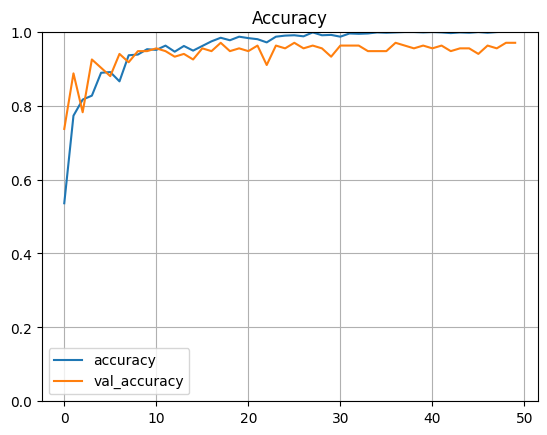

In [9]:
historyx= pd.DataFrame(history.history)
plt.title("Accuracy")
plt.plot(historyx["accuracy"], label="accuracy")
plt.plot(historyx["val_accuracy"],  label="val_accuracy")
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [10]:
loss, accuracy = model.evaluate(training_set)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

33/33 [==============================] - 2s 73ms/step - loss: 0.0010 - accuracy: 1.0000
Loss:  0.0010234583169221878
Accuracy:  1.0


In [11]:
loss, accuracy = model.evaluate(testing_set)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

4/4 [==============================] - 1s 173ms/step - loss: 0.2464 - accuracy: 0.9453
Loss:  0.24637152254581451
Accuracy:  0.9453125
